In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

/home/robot/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
options = {
    'model' : 'cfg/yolo.cfg',
    'load' : 'bin/yolo.weights',
    'threshold' : 0.3
}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.16067862510681152s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!

In [6]:
img = cv2.imread('../assets/team.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = tfnet.return_predict(img)
print("shape : ",img.shape)
print(result)

shape :  (768, 1366, 3)
[{'label': 'person', 'confidence': 0.8644963, 'topleft': {'x': 703, 'y': 185}, 'bottomright': {'x': 937, 'y': 747}}, {'label': 'person', 'confidence': 0.8212093, 'topleft': {'x': 324, 'y': 243}, 'bottomright': {'x': 502, 'y': 767}}, {'label': 'person', 'confidence': 0.83256084, 'topleft': {'x': 465, 'y': 215}, 'bottomright': {'x': 645, 'y': 767}}]


True

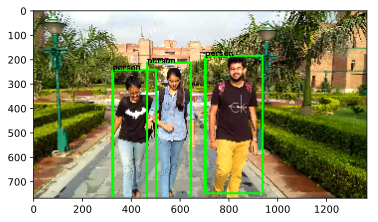

In [17]:
length = len(result)
for i in range(length):
    # topleft
    tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
    # bottom right
    br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
    label = result[i]['label']
    img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
    img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0,0), 2)
plt.imshow(img)

In [18]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('team.png', img)

True